In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def sanitise_angle(angle: float):
    max_value = 2 * math.pi 

    if angle < 0:
        return max_value + angle
    elif angle >= max_value:
        return angle - max_value
    else:
        return angle

In [16]:
class AngularVector:
    def __init__(self, mag: float, angle: float):
        self.mag = mag
        self.angle = sanitise_angle(angle) 
        
    def sineMag(self, offset: float = 0, reverse: bool = False):
        if not reverse:
            return math.sin(self.angle - offset) * self.mag
        else:
            return math.sin(offset - self.angle) * self.mag
        
    def cosineMag(self, offset: float = 0.0, reverse: bool = False):
        if not reverse:
            return math.cos(self.angle - offset) * self.mag
        else:
            return math.cos(offset - self.angle) * self.mag
        
    def getCartesianComponents(self):
        if self.angle <= math.pi /2:
            return np.array([self.cosineMag(), self.sineMag()])
        
        elif math.pi /2 < self.angle <= math.pi:
            return np.array([-self.cosineMag(math.pi, True), self.sineMag(math.pi, True)])
        
        elif math.pi < self.angle <= 1.5 * math.pi:
            return np.array([-self.cosineMag(math.pi, False), -self.sineMag(math.pi, False)])
        
        else:
            return np.array([self.cosineMag(math.pi * 2, True), -self.sineMag(math.pi * 2, True)])
        
    def placeholder(factor: float):
        self.mag = self.mag * factor

In [17]:
class Position(AngularVector):
    def __init__(self, mag: float, angle: float):
        super().__init__(mag, angle)

In [18]:
stupidList = np.array([0,0])
steps = 100
angleOffset = (math.pi * 2)/100

for i in range(steps):
    newCoords = Position(1, angleOffset * i).getCartesianComponents()
    stupidList = np.vstack((stupidList, newCoords))

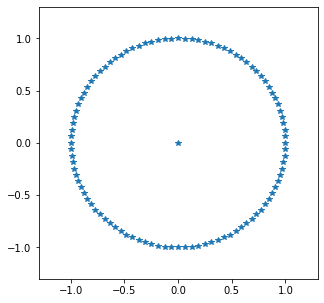

In [19]:
plt.figure(figsize = (5,5))
plt.plot(stupidList[:,0], stupidList[:,1], '*')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.show()